In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### 3. pie chart
#### 1) 빈도표
아래 데이터에 대한 빈도표를 구해보아라.

In [15]:
l = ['Frogs', 'Hogs', 'Dogs', 'Logs', 'Hogs', 'Dogs', 'Frogs', 'Hogs', 'Dogs', \
 'Frogs', 'Hogs', 'Dogs', 'Logs', 'Frogs', 'Hogs', 'Dogs', 'Logs', 'Hogs', \
 'Frogs', 'Frogs', 'Frogs', 'Dogs', 'Dogs', 'Dogs', 'Dogs', 'Dogs', 'Dogs']

In [16]:
l.count('Frogs')

7

In [17]:
sizes = []
labels = list(set(l))
for e in labels:
    sizes.append(l.count(e))

print(labels)
print(sizes)
    

['Dogs', 'Logs', 'Hogs', 'Frogs']
[11, 3, 6, 7]


In [20]:
arr = np.array(l)
labels,sizes = np.unique(arr, return_counts=True)

print(labels)
print(sizes)

['Dogs' 'Frogs' 'Hogs' 'Logs']
[11  7  6  3]


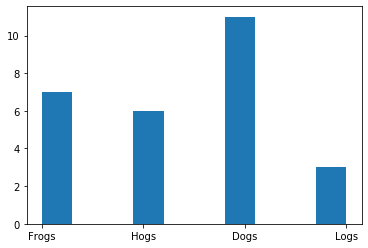

In [21]:
n, bins, patches = plt.hist(np.array(l), bins=10)
plt.show()

In [23]:
li = ['Frogs']*15 + ['Hogs']*30 + ['Dogs']*45 + ['Logs']*10
arr = np.array(li) # 자동으로 빈도가 높은 순으로 배열을 해준다
labels,sizes = np.unique(arr, return_counts=True)

print(labels)
print(sizes)

['Dogs' 'Frogs' 'Hogs' 'Logs']
[45 15 30 10]


#### 2) 파이챠트

In [26]:
type(labels)

tuple

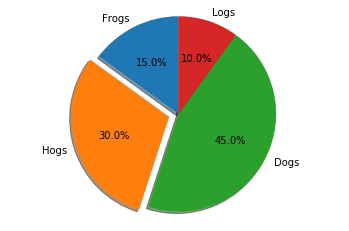

In [25]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
# Hogs 부분만 0.1정도 밖으로 돌출

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90) # 그림자효과, 시작 각도 90도
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# equal하지 않으면 넙덕해짐
plt.show()

### 4. bar chart
#### 1) stacked bar chart

In [28]:
np.arange(N) # numpy에서 array를 return하는 역할

array([0, 1, 2, 3, 4])

In [31]:
np.arange(0, 81, 10) # 80까지하면 80이 짤린다

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80])

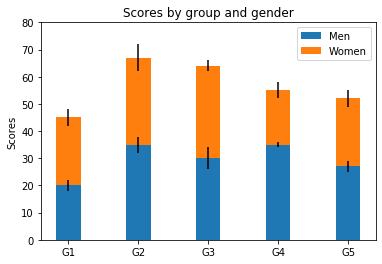

In [27]:
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd) #인덱스 01234에 해당하는 값들... yerr - 표준편차 넣어줌
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, labels)
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

#### 2) Grouped bar chart

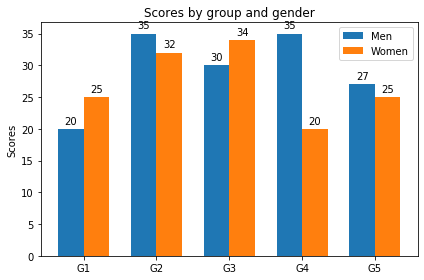

In [34]:
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, menMeans, width, label='Men')
rects2 = ax.bar(ind + width/2, womenMeans, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

### 5. scatter plot

In [36]:
price_data

rec.array([('2007-10-18', 635.41, 641.37, 628.5 , 639.62, 12289200, 639.62),
           ('2007-10-19', 654.56, 658.49, 643.23, 644.71, 15789000, 644.71),
           ('2007-10-22', 638.67, 655.  , 636.28, 650.75,  6664400, 650.75),
           ('2007-10-23', 661.25, 677.6 , 660.  , 675.77,  6793700, 675.77),
           ('2007-10-24', 672.71, 677.47, 659.56, 675.82,  7404200, 675.82),
           ('2007-10-25', 678.68, 678.97, 663.55, 668.51,  5795500, 668.51),
           ('2007-10-26', 674.03, 676.54, 668.06, 674.6 ,  3353900, 674.6 ),
           ('2007-10-29', 677.77, 680.  , 672.09, 679.23,  3066300, 679.23),
           ('2007-10-30', 677.51, 699.91, 677.51, 694.77,  6900600, 694.77),
           ('2007-10-31', 700.69, 707.  , 696.04, 707.  ,  6876800, 707.  ),
           ('2007-11-01', 702.79, 713.72, 701.78, 703.21,  6527200, 703.21),
           ('2007-11-02', 710.51, 713.58, 697.34, 711.25,  5841500, 711.25),
           ('2007-11-05', 706.99, 730.23, 706.07, 725.65,  8883700, 725.65),

In [38]:
close = [34, 32, 35, 36, 40, 41]
close[:2]

[34, 32]

In [39]:
arr = np.array(close)
np.diff(arr)
#이전 데이터와의 차를 만들어 내는 함수

array([-2,  3,  1,  4,  1])

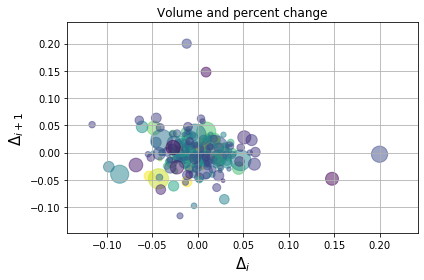

In [35]:
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
price_data = np.load('goog.npz')['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1] # 주가 등락률


# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5) # alpha는 투명도
# delta1[:-1]- 어제의 등락률, delta1[1:]- 오늘의 등락률

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show() # 0에 다 몰린 결과. 결국 어제오늘등락률 간의 관계는 적어보임

## PPT 실습실습

도수분포표의 평균값 구하기

In [1]:
scores = [12, 17, 22, 27, 32]
freqs = [2, 4, 7, 13, 3]

In [4]:
scores = np.array(scores)
freqs = np.array(freqs)

$\cfrac{1}{N} \sum_i f_i x_i$

In [10]:
scores.dot(freqs) / freqs.sum()
# .dot이 뭔뜻이냐

23.896551724137932

중앙값구하기

In [16]:
np.random.seed(213)
arr = np.random.randint(1,100, 51) 
arr

array([44, 97,  2, 44, 83, 71, 60, 55, 74, 68, 26, 90, 79, 66, 21, 41,  7,
       21, 99, 31, 23, 72, 95, 99, 84, 37, 46, 56, 37, 29, 50, 11, 27, 32,
        6, 80, 36, 22, 95, 92, 68, 14, 28,  9, 48, 80, 51, 53, 74, 51, 36])

In [31]:
arr.sort()
arr


array([ 2,  6,  7,  9, 11, 14, 21, 21, 22, 23, 26, 27, 28, 29, 31, 32, 36,
       36, 37, 37, 41, 44, 44, 46, 48, 50, 51, 51, 53, 55, 56, 60, 66, 68,
       68, 71, 72, 74, 74, 79, 80, 80, 83, 84, 90, 92, 95, 95, 97, 99, 99])

In [32]:
ind = (len(arr)+1) /2
type(ind)

float

In [33]:
ind = int((len(arr)+1) /2)
arr[ind-1] # 인덱스가 0부터 시작하니까

50

In [26]:
np.median(arr)
np.mean(arr)

50.0

최빈값 구하기 - 가장 빈도 수가 많은 값

In [35]:
np.random.seed(213)
arr = np.random.randint(1, 11, 100)
arr

array([ 5,  1,  2, 10,  3,  7,  4,  8,  7, 10,  4, 10, 10,  4,  2,  5,  9,
        7,  5,  3,  7,  8,  3,  4,  5,  8,  5,  7,  2,  6,  7,  3,  9,  4,
        6,  8,  4,  9,  3,  4,  5, 10,  3,  4,  7,  9,  3,  2,  6,  3,  8,
        3,  5,  8,  7,  8,  8,  8,  6,  5,  4,  1,  7,  3,  9,  3,  5,  6,
        2,  9,  2,  5,  9,  9,  7,  5,  1,  9,  5,  2,  7,  1,  4,  7,  9,
        9, 10,  6,  7,  2,  2,  1,  6,  7,  4,  4, 10,  2,  1,  3])

In [42]:
vals, cnts = np.unique(arr, return_counts = True)
print(vals)
print(cnts)

[ 1  2  3  4  5  6  7  8  9 10]
[ 6 10 12 12 12  7 14  9 11  7]


In [43]:
cnts.argmax()
vals[cnts.argmax()]

7

In [46]:
from collections import Counter
counter = Counter(arr).most_common(n=1) # n=1을 넣지 않으면 모든 수가 빈도 순으로 출력
counter

[(7, 14)]

$y = 2.1 x^2 + 3.4x +\epsilon $

In [49]:
x = np.random.randn(100) * 10
y = 2.1 * x**2 + 3.4 * x + np.random.randn(100)

In [50]:
x.shape

(100,)

In [51]:
X = np.hstack([x.reshape(-1, 1), (x**2).reshape(-1, 1)])
X.shape

(100, 2)

In [52]:
X

array([[-7.67657975e+00,  5.89298767e+01],
       [ 7.70945529e+00,  5.94357009e+01],
       [-7.68809229e+00,  5.91067631e+01],
       [ 1.44962706e+00,  2.10141861e+00],
       [-1.87806589e+01,  3.52713149e+02],
       [-7.16673519e+00,  5.13620933e+01],
       [-7.61592961e+00,  5.80023838e+01],
       [-6.96110294e+00,  4.84569542e+01],
       [-4.03207871e+00,  1.62576588e+01],
       [-9.40376974e+00,  8.84308854e+01],
       [ 7.39980478e+00,  5.47571108e+01],
       [-2.82236074e+00,  7.96572016e+00],
       [-2.88839406e+01,  8.34282025e+02],
       [ 1.67748931e+01,  2.81397038e+02],
       [ 3.78673352e+00,  1.43393508e+01],
       [-4.95822424e+00,  2.45839876e+01],
       [ 4.36978263e+00,  1.90950002e+01],
       [ 4.60130343e+00,  2.11719932e+01],
       [-1.83660554e+01,  3.37311991e+02],
       [ 7.47869878e+00,  5.59309355e+01],
       [ 1.41378412e+01,  1.99878553e+02],
       [ 1.13223482e+01,  1.28195568e+02],
       [ 3.47954112e+00,  1.21072064e+01],
       [-1.

In [53]:
x = np.array([2, 6, 7]) 
y = np.array([13, 20, 27])

In [54]:
1/(len(x)-1) * (x-x.mean()).dot(y-y.mean()) / \
    (x.std(ddof=1)*y.std(ddof=1))

0.9449111825230679

In [55]:
np.corrcoef(x,y)

array([[1.        , 0.94491118],
       [0.94491118, 1.        ]])

In [56]:
1/(len(x)) * (x-x.mean()).dot(y-y.mean()) / \
    (x.std()*y.std())

0.9449111825230679